In [ ]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1279 sha256=d1f98293bad3f0cdfcf22c6dd4dad34fd328f539bd257c06e4df3c23381ad6ec
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [ ]:
!unzip /content/dataset1.zip -d /content/

Archive:  /content/sample.zip
   creating: /content/sample/images/
  inflating: /content/sample/images/Grape___Black_rot1.JPG  
  inflating: /content/sample/images/Grape___Black_rot11.JPG  
  inflating: /content/sample/images/Grape___Black_rot12.JPG  
  inflating: /content/sample/images/Grape___Black_rot13.JPG  
  inflating: /content/sample/images/Grape___Black_rot14.JPG  
  inflating: /content/sample/images/Grape___Black_rot15.JPG  
  inflating: /content/sample/images/Grape___Black_rot17.JPG  
  inflating: /content/sample/images/Grape___Black_rot18.JPG  
  inflating: /content/sample/images/Grape___Black_rot3.JPG  
  inflating: /content/sample/images/Grape___Black_rot5.JPG  
  inflating: /content/sample/images/Grape___Black_rot6.JPG  
  inflating: /content/sample/images/Grape___Black_rot7.JPG  
  inflating: /content/sample/images/Grape___Esca1.JPG  
  inflating: /content/sample/images/Grape___Esca11.JPG  
  inflating: /content/sample/images/Grape___Esca17.JPG  
  inflating: /content/sa

In [ ]:
# this is sample code for reading an image and respective coordinates of the bounding box and printing it
import cv2

# Read the image and get its dimensions
img = cv2.imread("/content/runs/detect/predict/Grape___healthy262.JPG")
h, w = img.shape[:2]

# Read the text content from file and split it into lines
with open("/content/runs/detect/predict/labels/Grape___Leaf_blight987.txt", "r") as f:
    lines = f.read().splitlines()

# Initialize an empty list to store the coordinates
coordinates = []

# Iterate over each line and extract the values
for line in lines:
    values = line.split()
    x, y, nw, nh = map(float, values[1:])

    # Multiply the normalized values by the image dimensions
    xc1 = x * w
    yc1 = y * h
    nw1 = nw * w
    nh1 = nh * h

    # Calculate the top-left and bottom-right coordinates
    top_left = int(xc1 - nw1/2), int(yc1 - nh1/2)
    bottom_right = int(xc1 + nw1/2), int(yc1 + nh1/2)

    # Append the coordinates as a list of 4 values
    coordinates.append([top_left[0], top_left[1], bottom_right[0], bottom_right[1]])

# Print the list of coordinates
print(coordinates)


[[189, 118, 218, 157], [172, 182, 199, 204], [221, 143, 241, 166], [148, 86, 163, 101], [132, 94, 144, 109], [47, 75, 65, 96], [149, 147, 166, 165], [166, 117, 182, 133], [69, 76, 88, 102], [76, 143, 90, 158], [155, 58, 168, 73], [233, 179, 249, 194], [110, 68, 122, 81], [222, 194, 237, 208], [135, 192, 147, 204]]


In [ ]:
using_colab = True

In [ ]:
# this code is for downloading all the requirements for the segment anything model
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-yfq5b5rz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-yfq5b5rz
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=ce2130286d40fbea66174ad1ddd4a9c6e756b5f036374ad25a5cd6905c9350b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-8la6j33n/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segm

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
# this function is used to display the segmented region with some random color
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

In [ ]:
# reading an sample image and printing it
img = cv2.imread("/content/dataset_imageslabels/images/train/Grape___Black_rot1.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

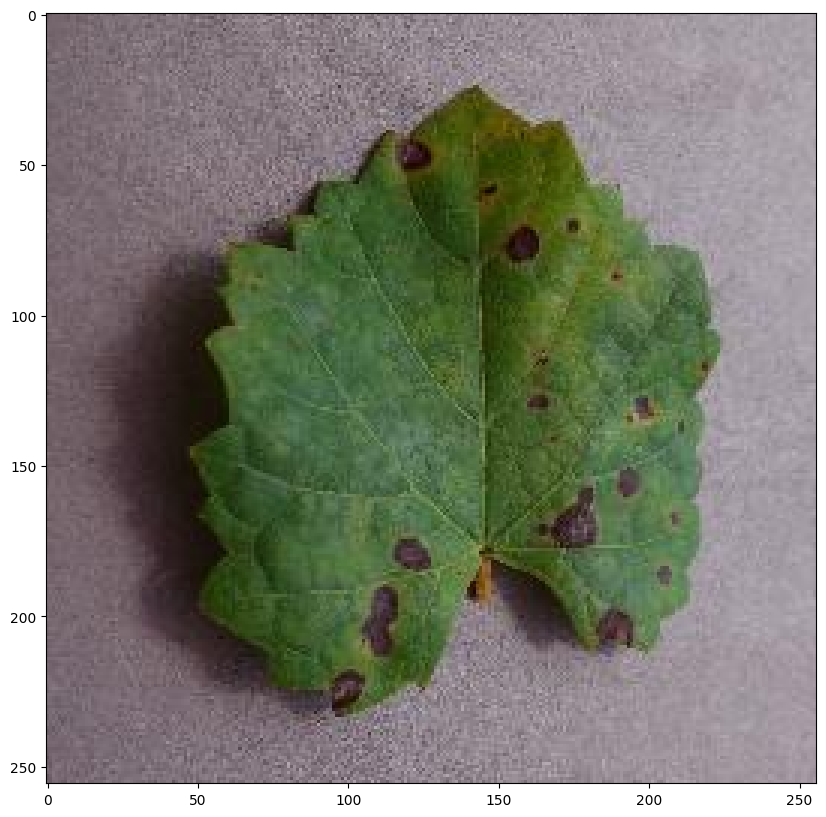

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()

In [ ]:
# setting up the segment anything model
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [ ]:
# this is sample code for converting the coordinates list to the segment anything model format
input_boxes = torch.tensor([
    coordinates
], device=predictor.device)

In [ ]:

input_boxes


tensor([[[120, 120, 120, 120]]], device='cuda:0')

In [ ]:
# we transform the input_boxes so we can give them to the sam predictor
transformed_boxes = predictor.transform.apply_boxes_torch(input_boxes, img.shape[:2])


In [ ]:
# this is were the input coordinates are taken and diseased area is segmented
masks, _, _ = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed_boxes,
    multimask_output=False,
)

In [ ]:
# this code is for checking labels.txt file is present for every image or not
import os

image_folder = "/content/runs/detect/predict"
text_folder = "/content/runs/detect/predict/labels"

# Get a list of all image files in the image folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.JPG')]

# Iterate over each image file
for image_file in image_files:
    # Check if the corresponding text file exists
    text_file = os.path.join(text_folder, os.path.splitext(image_file)[0] + '.txt')
    if not os.path.exists(text_file):
        # If the text file does not exist, create an empty one
        open(text_file, 'a').close()
        print(f"Created empty text file for {image_file}")
    else:
        print(f"Found text file for {image_file}")


Found text file for Grape___Black_rot193.JPG
Found text file for Grape___Esca1159.JPG
Found text file for Grape___Black_rot468.JPG
Found text file for Grape___Esca988.JPG
Found text file for Grape___Black_rot956.JPG
Created empty text file for Grape___healthy48.JPG
Found text file for Grape___Black_rot1060.JPG
Found text file for Grape___Black_rot41.JPG
Found text file for Grape___Leaf_blight26.JPG
Found text file for Grape___Leaf_blight261.JPG
Found text file for Grape___Leaf_blight235.JPG
Found text file for Grape___Leaf_blight872.JPG
Found text file for Grape___Leaf_blight728.JPG
Found text file for Grape___Leaf_blight190.JPG
Found text file for Grape___Esca962.JPG
Found text file for Grape___Black_rot443.JPG
Found text file for Grape___Esca239.JPG
Found text file for Grape___Leaf_blight701.JPG
Found text file for Grape___Black_rot138.JPG
Found text file for Grape___Leaf_blight967.JPG
Found text file for Grape___Leaf_blight452.JPG
Found text file for Grape___Black_rot986.JPG
Found t

In [ ]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
# Path to the images folder and text folder
img_folder = "/content/dataset_imageslabels/images/val"
txt_folder = "/content/dataset_imageslabels/labels/val"
save_dir  = "/content/segmented_val"

# List all image files in the images folder
img_files = glob.glob(os.path.join(img_folder, "*.JPG"))

# Loop through each image file
for img_file in img_files:
    # Read the image and get its dimensions
    img7 = cv2.imread(img_file)
    img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
    h, w = img7.shape[:2]

    # Get the corresponding text file
    txt_file = os.path.join(txt_folder, os.path.splitext(os.path.basename(img_file))[0] + ".txt")
    if os.stat(txt_file).st_size == 0:
        # Save a copy of the image as "current image name _segmented.png" inside the "segmented" folder
      filename, ext = os.path.splitext(img_file)
      new_filename = os.path.basename(filename) + '_segmented.png'
      new_filepath = os.path.join(save_dir, new_filename)
      plt.imsave(new_filepath, img7)
      continue
    # Read the text content from file and split it into lines
    with open(txt_file, "r") as f:
        lines = f.read().splitlines()

    # Initialize an empty list to store the coordinates
    coordinates = []

    # Iterate over each line and extract the values
    for line in lines:
        values = line.split()
        x, y, nw, nh = map(float, values[1:])

        # Multiply the normalized values by the image dimensions
        xc1 = x * w
        yc1 = y * h
        nw1 = nw * w
        nh1 = nh * h

        # Calculate the top-left and bottom-right coordinates
        top_left = int(xc1 - nw1/2), int(yc1 - nh1/2)
        bottom_right = int(xc1 + nw1/2), int(yc1 + nh1/2)

        # Append the coordinates as a list of 4 values
        coordinates.append([top_left[0], top_left[1], bottom_right[0], bottom_right[1]])
    #  this line is for setting the image for predection
    predictor.set_image(img7)

    # converting the coordinates list to the input_boxes
    input_boxes = torch.tensor([
    coordinates
    ], device=predictor.device)

# input_boxes are then transformed into the predictor format of the sam model
    transformed_boxes = predictor.transform.apply_boxes_torch(input_boxes, img7.shape[:2])
    masks, _, _ = predictor.predict_torch(
        point_coords=None,
        point_labels=None,
        boxes=transformed_boxes,
        multimask_output=False,
    )

    masks_np = [mask[0].cpu().numpy() for mask in masks]

    # Create a new numpy array to hold the segmented image, initialized with zeros
    segmented_image = np.zeros_like(masks_np[0])

    # Set the pixels where any of the masks are True to 1 in the `segmented_image` array
    for mask in masks_np:
        segmented_image[np.array(mask, dtype=bool)] = 1

    # Remove the first dimension of `segmented_image` using the `squeeze` method
    segmented_image = segmented_image.squeeze()

    # Apply the mask to the original image using NumPy indexing
    masked_img = img7.copy()
    masked_img[~np.array(segmented_image, dtype=bool)] = 0

    # Get the image filename without the extension
    filename, ext = os.path.splitext(img_file)

    # Construct the new filename for the segmented image
    new_filename = os.path.basename(filename) + '_segmented.png'
    new_filepath = os.path.join(save_dir, new_filename)
    # Save the segmented image to disk using plt.imsave
    plt.imsave(new_filepath, masked_img, cmap='gray', vmin=0, vmax=1)




In [ ]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
#  for training the cnn model we need the labelled data
# so all the segmented images are separated into respective folders according to their disease names
import os
import re
import shutil

# Define the source and destination directories
# this location contains the mix of all the segmented images
source_dir = '/content/segmented'
# this location contains the separated segmented images into folders according to their names
dest_dir = '/content/sample_data/seg'

# Define the prefixes
prefixes = ['Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight']

# Create the destination directories
for prefix in prefixes:
    os.makedirs(os.path.join(dest_dir, prefix), exist_ok=True)

print(f"Number of files in {source_dir}: {len(os.listdir(source_dir))}")

# Loop over the files in the source directory
for file_name in os.listdir(source_dir):
    # Extract the prefix from the file name
    prefix_match = re.search(r'^(Grape___(?:Black_rot|Esca|Leaf_blight))\d*_segmented\.png$', file_name)
    if prefix_match:
        prefix = prefix_match.group(1)
        print(prefix)
        if prefix in prefixes:
            # Construct the source and destination paths
            src_path = os.path.join(source_dir, file_name)
            dest_path = os.path.join(dest_dir, prefix, file_name)

            print(f"Copying {src_path} to {dest_path}")

            # Copy the file to the destination directory
            shutil.copy(src_path, dest_path)


In [ ]:
# this is for the testing phase

import os
import re
import shutil

# Define the source and destination directories
source_dir = '/content/segmented'
dest_dir = '/content/segmented_test'

# Define the prefixes
prefixes = ['Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight', 'Grape___healthy']

# Create the destination directories
for prefix in prefixes:
    os.makedirs(os.path.join(dest_dir, prefix), exist_ok=True)

print(f"Number of files in {source_dir}: {len(os.listdir(source_dir))}")

# Loop over the files in the source directory
for file_name in os.listdir(source_dir):
    # Extract the prefix from the file name
    prefix_match = re.search(r'^(Grape___(?:Black_rot|Esca|Leaf_blight|healthy))\d*_segmented\.png$', file_name)
    if prefix_match:
        prefix = prefix_match.group(1)
        print(prefix)
        if prefix in prefixes:
            # Construct the source and destination paths
            src_path = os.path.join(source_dir, file_name)
            dest_path = os.path.join(dest_dir, prefix, file_name)

            print(f"Copying {src_path} to {dest_path}")

            # Copy the file to the destination directory
            shutil.copy(src_path, dest_path)


Number of files in /content/segmented: 814
Grape___Leaf_blight
Copying /content/segmented/Grape___Leaf_blight32_segmented.png to /content/segmented_test/Grape___Leaf_blight/Grape___Leaf_blight32_segmented.png
Grape___healthy
Copying /content/segmented/Grape___healthy135_segmented.png to /content/segmented_test/Grape___healthy/Grape___healthy135_segmented.png
Grape___Leaf_blight
Copying /content/segmented/Grape___Leaf_blight312_segmented.png to /content/segmented_test/Grape___Leaf_blight/Grape___Leaf_blight312_segmented.png
Grape___Black_rot
Copying /content/segmented/Grape___Black_rot1109_segmented.png to /content/segmented_test/Grape___Black_rot/Grape___Black_rot1109_segmented.png
Grape___Black_rot
Copying /content/segmented/Grape___Black_rot326_segmented.png to /content/segmented_test/Grape___Black_rot/Grape___Black_rot326_segmented.png
Grape___Esca
Copying /content/segmented/Grape___Esca335_segmented.png to /content/segmented_test/Grape___Esca/Grape___Esca335_segmented.png
Grape___h

In [ ]:
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

# Define the input directory
input_dir = '/content/sample_data/seg'

# Define the output directory for the train and validation sets
output_dir = '/content/sample_data/split_data'

# Split the input directory into train and validation sets with a 70/30 split
splitfolders.ratio(input_dir, output=output_dir, seed=42, ratio=(0.7, 0.3))


Copying files: 44 files [00:00, 1732.84 files/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
!pip install scipy
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


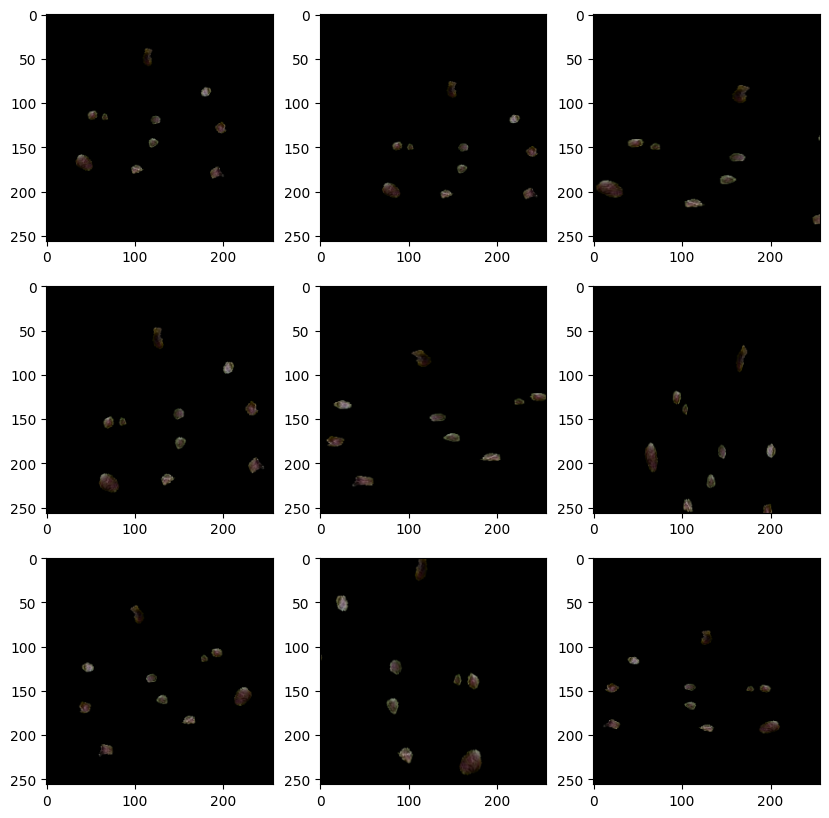

In [ ]:
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from matplotlib import pyplot
import scipy

img = load_img("/content/segmented_test/Grape___Black_rot/Grape___Black_rot1003_segmented.png")
data = img_to_array(img)


aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.5,
    zoom_range=0.4,horizontal_flip=True,
    fill_mode="nearest")
samples = expand_dims(data, 0)


it = aug.flow(samples, batch_size=1)
plt.figure(figsize=(10, 10))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint')
	pyplot.imshow(image)
pyplot.show()

In [ ]:
train_datagen = ImageDataGenerator(
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.2,
zoom_range=0.1
)

In [ ]:
val_datagen = ImageDataGenerator(
    zoom_range=0.01

)

In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    directory="/content/segmented_test",
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 814 images belonging to 4 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/segmented_data_split/train",
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=6,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 2019 images belonging to 4 classes.


In [ ]:
valid_generator = val_datagen.flow_from_directory(
    directory=r"/content/segmented_data_split/val",
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=6,
    class_mode="categorical",
    seed=42
)

Found 404 images belonging to 4 classes.


In [ ]:
op=train_generator.n//train_generator.batch_size
op2=valid_generator.n//valid_generator.batch_size
print(op,op2)

336 67


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization
from keras.layers.core import Activation, Flatten, Dropout, Dense
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(128,128,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding = "same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4))
model.add(Activation("softmax"))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate =0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["acc"])

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the checkpoint filepath
checkpoint_filepath = "/content/drive/MyDrive/project/finalproject/checkpoints"

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

In [ ]:
his=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//32,
    epochs=500 ,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples//32,
    callbacks=[checkpoint_callback])



Epoch 1/500
62/63 [============================>.] - ETA: 0s - loss: 1.3899 - acc: 0.5215
Epoch 1: val_loss improved from inf to 0.99398, saving model to /content/drive/MyDrive/project/finalproject/checkpoints


63/63 [==============================] - 19s 96ms/step - loss: 1.3788 - acc: 0.5265 - val_loss: 0.9940 - val_acc: 0.5417
Epoch 2/500
63/63 [==============================] - ETA: 0s - loss: 1.1320 - acc: 0.5767
Epoch 2: val_loss improved from 0.99398 to 0.88494, saving model to /content/drive/MyDrive/project/finalproject/checkpoints


63/63 [==============================] - 6s 103ms/step - loss: 1.1320 - acc: 0.5767 - val_loss: 0.8849 - val_acc: 0.6250
Epoch 3/500
63/63 [==============================] - ETA: 0s - loss: 0.8667 - acc: 0.6508
Epoch 3: val_loss did not improve from 0.88494
63/63 [==============================] - 3s 46ms/step - loss: 0.8667 - acc: 0.6508 - val_loss: 1.0357 - val_acc: 0.6944
Epoch 4/500
63/63 [==============================] - ETA: 0s - loss: 0.9465 - acc: 0.6481
Epoch 4: val_loss improved from 0.88494 to 0.61162, saving model to /content/drive/MyDrive/project/finalproject/checkpoints


63/63 [==============================] - 6s 102ms/step - loss: 0.9465 - acc: 0.6481 - val_loss: 0.6116 - val_acc: 0.7917
Epoch 5/500
63/63 [==============================] - ETA: 0s - loss: 0.9194 - acc: 0.6455
Epoch 5: val_loss did not improve from 0.61162
63/63 [==============================] - 3s 41ms/step - loss: 0.9194 - acc: 0.6455 - val_loss: 0.6648 - val_acc: 0.7083
Epoch 6/500
63/63 [==============================] - ETA: 0s - loss: 0.8333 - acc: 0.6667
Epoch 6: val_loss did not improve from 0.61162
63/63 [==============================] - 3s 42ms/step - loss: 0.8333 - acc: 0.6667 - val_loss: 0.7485 - val_acc: 0.6528
Epoch 7/500
63/63 [==============================] - ETA: 0s - loss: 0.9668 - acc: 0.6296
Epoch 7: val_loss did not improve from 0.61162
63/63 [==============================] - 4s 56ms/step - loss: 0.9668 - acc: 0.6296 - val_loss: 0.7957 - val_acc: 0.6528
Epoch 8/500
62/63 [============================>.] - ETA: 0s - loss: 0.8363 - acc: 0.6612
Epoch 8: val_loss 

63/63 [==============================] - 7s 105ms/step - loss: 0.7683 - acc: 0.6880 - val_loss: 0.5349 - val_acc: 0.7917
Epoch 11/500
63/63 [==============================] - ETA: 0s - loss: 0.8096 - acc: 0.6931
Epoch 11: val_loss improved from 0.53486 to 0.52773, saving model to /content/drive/MyDrive/project/finalproject/checkpoints


63/63 [==============================] - 5s 85ms/step - loss: 0.8096 - acc: 0.6931 - val_loss: 0.5277 - val_acc: 0.8056
Epoch 12/500
63/63 [==============================] - ETA: 0s - loss: 0.7640 - acc: 0.6933
Epoch 12: val_loss did not improve from 0.52773
63/63 [==============================] - 3s 53ms/step - loss: 0.7640 - acc: 0.6933 - val_loss: 0.6683 - val_acc: 0.7083
Epoch 13/500
63/63 [==============================] - ETA: 0s - loss: 0.8676 - acc: 0.6746
Epoch 13: val_loss improved from 0.52773 to 0.49455, saving model to /content/drive/MyDrive/project/finalproject/checkpoints


63/63 [==============================] - 5s 86ms/step - loss: 0.8676 - acc: 0.6746 - val_loss: 0.4945 - val_acc: 0.7361
Epoch 14/500
63/63 [==============================] - ETA: 0s - loss: 0.7362 - acc: 0.7037
Epoch 14: val_loss did not improve from 0.49455
63/63 [==============================] - 3s 53ms/step - loss: 0.7362 - acc: 0.7037 - val_loss: 0.6882 - val_acc: 0.7500
Epoch 15/500
62/63 [============================>.] - ETA: 0s - loss: 0.7271 - acc: 0.7446
Epoch 15: val_loss improved from 0.49455 to 0.47115, saving model to /content/drive/MyDrive/project/finalproject/checkpoints


63/63 [==============================] - 5s 85ms/step - loss: 0.7181 - acc: 0.7487 - val_loss: 0.4711 - val_acc: 0.7778
Epoch 16/500
63/63 [==============================] - ETA: 0s - loss: 0.7749 - acc: 0.7116
Epoch 16: val_loss did not improve from 0.47115
63/63 [==============================] - 3s 48ms/step - loss: 0.7749 - acc: 0.7116 - val_loss: 0.5053 - val_acc: 0.7639
Epoch 17/500
62/63 [============================>.] - ETA: 0s - loss: 0.6747 - acc: 0.7425
Epoch 17: val_loss did not improve from 0.47115
63/63 [==============================] - 3s 54ms/step - loss: 0.6672 - acc: 0.7440 - val_loss: 0.5892 - val_acc: 0.7500
Epoch 18/500
63/63 [==============================] - ETA: 0s - loss: 0.7289 - acc: 0.7249
Epoch 18: val_loss improved from 0.47115 to 0.36382, saving model to /content/drive/MyDrive/project/finalproject/checkpoints


63/63 [==============================] - 5s 86ms/step - loss: 0.7289 - acc: 0.7249 - val_loss: 0.3638 - val_acc: 0.8333
Epoch 19/500
63/63 [==============================] - ETA: 0s - loss: 0.6808 - acc: 0.7275
Epoch 19: val_loss did not improve from 0.36382
63/63 [==============================] - 3s 44ms/step - loss: 0.6808 - acc: 0.7275 - val_loss: 0.4818 - val_acc: 0.7917
Epoch 20/500
62/63 [============================>.] - ETA: 0s - loss: 0.6164 - acc: 0.7453
Epoch 20: val_loss did not improve from 0.36382
63/63 [==============================] - 3s 42ms/step - loss: 0.6294 - acc: 0.7413 - val_loss: 0.5320 - val_acc: 0.7639
Epoch 21/500
62/63 [============================>.] - ETA: 0s - loss: 0.7044 - acc: 0.7419
Epoch 21: val_loss did not improve from 0.36382
63/63 [==============================] - 2s 39ms/step - loss: 0.6956 - acc: 0.7460 - val_loss: 0.6103 - val_acc: 0.8056
Epoch 22/500
63/63 [==============================] - ETA: 0s - loss: 0.7124 - acc: 0.7222
Epoch 22: va

63/63 [==============================] - 5s 84ms/step - loss: 0.3595 - acc: 0.8492 - val_loss: 0.2586 - val_acc: 0.8889
Epoch 80/500
63/63 [==============================] - ETA: 0s - loss: 0.4014 - acc: 0.8439
Epoch 80: val_loss did not improve from 0.25860
63/63 [==============================] - 2s 37ms/step - loss: 0.4014 - acc: 0.8439 - val_loss: 0.3494 - val_acc: 0.8611
Epoch 81/500
61/63 [============================>.] - ETA: 0s - loss: 0.3864 - acc: 0.8552
Epoch 81: val_loss did not improve from 0.25860
63/63 [==============================] - 2s 37ms/step - loss: 0.3954 - acc: 0.8533 - val_loss: 0.3658 - val_acc: 0.8611
Epoch 82/500
63/63 [==============================] - ETA: 0s - loss: 0.3800 - acc: 0.8571
Epoch 82: val_loss did not improve from 0.25860
63/63 [==============================] - 3s 43ms/step - loss: 0.3800 - acc: 0.8571 - val_loss: 0.3255 - val_acc: 0.8611
Epoch 83/500
63/63 [==============================] - ETA: 0s - loss: 0.3920 - acc: 0.8667
Epoch 83: va

63/63 [==============================] - 6s 94ms/step - loss: 0.3235 - acc: 0.8720 - val_loss: 0.2068 - val_acc: 0.9167
Epoch 87/500
63/63 [==============================] - ETA: 0s - loss: 0.3858 - acc: 0.8598
Epoch 87: val_loss did not improve from 0.20683
63/63 [==============================] - 4s 56ms/step - loss: 0.3858 - acc: 0.8598 - val_loss: 0.3033 - val_acc: 0.8750
Epoch 88/500
63/63 [==============================] - ETA: 0s - loss: 0.3616 - acc: 0.8598
Epoch 88: val_loss did not improve from 0.20683
63/63 [==============================] - 3s 49ms/step - loss: 0.3616 - acc: 0.8598 - val_loss: 0.4446 - val_acc: 0.8611
Epoch 89/500
63/63 [==============================] - ETA: 0s - loss: 0.3584 - acc: 0.8545
Epoch 89: val_loss did not improve from 0.20683
63/63 [==============================] - 3s 42ms/step - loss: 0.3584 - acc: 0.8545 - val_loss: 0.8978 - val_acc: 0.7083
Epoch 90/500
63/63 [==============================] - ETA: 0s - loss: 0.3753 - acc: 0.8624
Epoch 90: va

63/63 [==============================] - 6s 93ms/step - loss: 0.3423 - acc: 0.8704 - val_loss: 0.1727 - val_acc: 0.9167
Epoch 144/500
62/63 [============================>.] - ETA: 0s - loss: 0.3102 - acc: 0.8790
Epoch 144: val_loss did not improve from 0.17266
63/63 [==============================] - 3s 50ms/step - loss: 0.3379 - acc: 0.8704 - val_loss: 0.4798 - val_acc: 0.8611
Epoch 145/500
63/63 [==============================] - ETA: 0s - loss: 0.3172 - acc: 0.8836
Epoch 145: val_loss did not improve from 0.17266
63/63 [==============================] - 2s 38ms/step - loss: 0.3172 - acc: 0.8836 - val_loss: 0.3591 - val_acc: 0.8333
Epoch 146/500
63/63 [==============================] - ETA: 0s - loss: 0.2729 - acc: 0.9021
Epoch 146: val_loss did not improve from 0.17266
63/63 [==============================] - 2s 38ms/step - loss: 0.2729 - acc: 0.9021 - val_loss: 0.5976 - val_acc: 0.8194
Epoch 147/500
62/63 [============================>.] - ETA: 0s - loss: 0.2846 - acc: 0.8835
Epoch

63/63 [==============================] - 6s 89ms/step - loss: 0.2569 - acc: 0.9040 - val_loss: 0.1324 - val_acc: 0.9444
Epoch 214/500
63/63 [==============================] - ETA: 0s - loss: 0.2746 - acc: 0.9074
Epoch 214: val_loss did not improve from 0.13243
63/63 [==============================] - 3s 53ms/step - loss: 0.2746 - acc: 0.9074 - val_loss: 0.2542 - val_acc: 0.9028
Epoch 215/500
63/63 [==============================] - ETA: 0s - loss: 0.1875 - acc: 0.9312
Epoch 215: val_loss did not improve from 0.13243
63/63 [==============================] - 2s 39ms/step - loss: 0.1875 - acc: 0.9312 - val_loss: 0.3055 - val_acc: 0.8472
Epoch 216/500
63/63 [==============================] - ETA: 0s - loss: 0.1893 - acc: 0.9339
Epoch 216: val_loss did not improve from 0.13243
63/63 [==============================] - 3s 40ms/step - loss: 0.1893 - acc: 0.9339 - val_loss: 0.5114 - val_acc: 0.8889
Epoch 217/500
63/63 [==============================] - ETA: 0s - loss: 0.1712 - acc: 0.9444
Epoch

63/63 [==============================] - 5s 84ms/step - loss: 0.2077 - acc: 0.9387 - val_loss: 0.1086 - val_acc: 0.9722
Epoch 220/500
63/63 [==============================] - ETA: 0s - loss: 0.2201 - acc: 0.9127
Epoch 220: val_loss did not improve from 0.10863
63/63 [==============================] - 3s 43ms/step - loss: 0.2201 - acc: 0.9127 - val_loss: 0.2874 - val_acc: 0.8611
Epoch 221/500
63/63 [==============================] - ETA: 0s - loss: 0.2191 - acc: 0.9127
Epoch 221: val_loss did not improve from 0.10863
63/63 [==============================] - 2s 38ms/step - loss: 0.2191 - acc: 0.9127 - val_loss: 0.1914 - val_acc: 0.9167
Epoch 222/500
63/63 [==============================] - ETA: 0s - loss: 0.2420 - acc: 0.9021
Epoch 222: val_loss did not improve from 0.10863
63/63 [==============================] - 3s 44ms/step - loss: 0.2420 - acc: 0.9021 - val_loss: 0.4443 - val_acc: 0.8611
Epoch 223/500
63/63 [==============================] - ETA: 0s - loss: 0.2229 - acc: 0.9233
Epoch

63/63 [==============================] - 5s 81ms/step - loss: 0.2848 - acc: 0.8836 - val_loss: 0.0933 - val_acc: 0.9722
Epoch 249/500
62/63 [============================>.] - ETA: 0s - loss: 0.1965 - acc: 0.9247
Epoch 249: val_loss did not improve from 0.09328
63/63 [==============================] - 3s 49ms/step - loss: 0.1938 - acc: 0.9259 - val_loss: 0.3247 - val_acc: 0.9028
Epoch 250/500
62/63 [============================>.] - ETA: 0s - loss: 0.1642 - acc: 0.9241
Epoch 250: val_loss did not improve from 0.09328
63/63 [==============================] - 3s 43ms/step - loss: 0.1628 - acc: 0.9253 - val_loss: 0.3352 - val_acc: 0.8889
Epoch 251/500
62/63 [============================>.] - ETA: 0s - loss: 0.2057 - acc: 0.9328
Epoch 251: val_loss did not improve from 0.09328
63/63 [==============================] - 3s 44ms/step - loss: 0.2150 - acc: 0.9312 - val_loss: 0.2217 - val_acc: 0.8889
Epoch 252/500
62/63 [============================>.] - ETA: 0s - loss: 0.1825 - acc: 0.9435
Epoch

63/63 [==============================] - 5s 86ms/step - loss: 0.2529 - acc: 0.9021 - val_loss: 0.0859 - val_acc: 0.9722
Epoch 271/500
63/63 [==============================] - ETA: 0s - loss: 0.1665 - acc: 0.9365
Epoch 271: val_loss did not improve from 0.08590
63/63 [==============================] - 3s 46ms/step - loss: 0.1665 - acc: 0.9365 - val_loss: 0.1677 - val_acc: 0.9306
Epoch 272/500
63/63 [==============================] - ETA: 0s - loss: 0.1991 - acc: 0.9127
Epoch 272: val_loss did not improve from 0.08590
63/63 [==============================] - 3s 43ms/step - loss: 0.1991 - acc: 0.9127 - val_loss: 0.2542 - val_acc: 0.9167
Epoch 273/500
63/63 [==============================] - ETA: 0s - loss: 0.2012 - acc: 0.9206
Epoch 273: val_loss did not improve from 0.08590
63/63 [==============================] - 2s 38ms/step - loss: 0.2012 - acc: 0.9206 - val_loss: 0.8288 - val_acc: 0.7083
Epoch 274/500
63/63 [==============================] - ETA: 0s - loss: 0.1794 - acc: 0.9312
Epoch

63/63 [==============================] - 5s 85ms/step - loss: 0.1895 - acc: 0.9312 - val_loss: 0.0819 - val_acc: 0.9861
Epoch 360/500
62/63 [============================>.] - ETA: 0s - loss: 0.1761 - acc: 0.9355
Epoch 360: val_loss did not improve from 0.08192
63/63 [==============================] - 3s 43ms/step - loss: 0.1751 - acc: 0.9365 - val_loss: 0.1012 - val_acc: 0.9722
Epoch 361/500
63/63 [==============================] - ETA: 0s - loss: 0.1077 - acc: 0.9577
Epoch 361: val_loss did not improve from 0.08192
63/63 [==============================] - 3s 40ms/step - loss: 0.1077 - acc: 0.9577 - val_loss: 0.1625 - val_acc: 0.9167
Epoch 362/500
63/63 [==============================] - ETA: 0s - loss: 0.0955 - acc: 0.9630
Epoch 362: val_loss did not improve from 0.08192
63/63 [==============================] - 3s 43ms/step - loss: 0.0955 - acc: 0.9630 - val_loss: 0.2305 - val_acc: 0.8889
Epoch 363/500
63/63 [==============================] - ETA: 0s - loss: 0.1720 - acc: 0.9312
Epoch

63/63 [==============================] - 7s 110ms/step - loss: 0.1588 - acc: 0.9418 - val_loss: 0.0809 - val_acc: 0.9722
Epoch 368/500
63/63 [==============================] - ETA: 0s - loss: 0.1738 - acc: 0.9253
Epoch 368: val_loss did not improve from 0.08094
63/63 [==============================] - 3s 42ms/step - loss: 0.1738 - acc: 0.9253 - val_loss: 0.3000 - val_acc: 0.9028
Epoch 369/500
63/63 [==============================] - ETA: 0s - loss: 0.1837 - acc: 0.9333
Epoch 369: val_loss did not improve from 0.08094
63/63 [==============================] - 3s 43ms/step - loss: 0.1837 - acc: 0.9333 - val_loss: 0.1837 - val_acc: 0.9167
Epoch 370/500
62/63 [============================>.] - ETA: 0s - loss: 0.1525 - acc: 0.9355
Epoch 370: val_loss did not improve from 0.08094
63/63 [==============================] - 4s 63ms/step - loss: 0.1517 - acc: 0.9365 - val_loss: 0.2446 - val_acc: 0.9167
Epoch 371/500
63/63 [==============================] - ETA: 0s - loss: 0.1172 - acc: 0.9471
Epoc

63/63 [==============================] - 6s 100ms/step - loss: 0.1415 - acc: 0.9524 - val_loss: 0.0787 - val_acc: 0.9444
Epoch 402/500
62/63 [============================>.] - ETA: 0s - loss: 0.1784 - acc: 0.9382
Epoch 402: val_loss did not improve from 0.07870
63/63 [==============================] - 2s 38ms/step - loss: 0.1802 - acc: 0.9365 - val_loss: 0.1297 - val_acc: 0.9306
Epoch 403/500
63/63 [==============================] - ETA: 0s - loss: 0.1875 - acc: 0.9471
Epoch 403: val_loss did not improve from 0.07870
63/63 [==============================] - 2s 38ms/step - loss: 0.1875 - acc: 0.9471 - val_loss: 0.1834 - val_acc: 0.9444
Epoch 404/500
63/63 [==============================] - ETA: 0s - loss: 0.1526 - acc: 0.9413
Epoch 404: val_loss did not improve from 0.07870
63/63 [==============================] - 4s 63ms/step - loss: 0.1526 - acc: 0.9413 - val_loss: 0.1296 - val_acc: 0.9583
Epoch 405/500
63/63 [==============================] - ETA: 0s - loss: 0.1920 - acc: 0.9333
Epoc

63/63 [==============================] - 5s 84ms/step - loss: 0.1750 - acc: 0.9360 - val_loss: 0.0738 - val_acc: 0.9722
Epoch 417/500
63/63 [==============================] - ETA: 0s - loss: 0.1403 - acc: 0.9603
Epoch 417: val_loss did not improve from 0.07382
63/63 [==============================] - 3s 52ms/step - loss: 0.1403 - acc: 0.9603 - val_loss: 0.2200 - val_acc: 0.9028
Epoch 418/500
63/63 [==============================] - ETA: 0s - loss: 0.1528 - acc: 0.9547
Epoch 418: val_loss did not improve from 0.07382
63/63 [==============================] - 3s 44ms/step - loss: 0.1528 - acc: 0.9547 - val_loss: 0.2887 - val_acc: 0.9028
Epoch 419/500
63/63 [==============================] - ETA: 0s - loss: 0.1750 - acc: 0.9493
Epoch 419: val_loss did not improve from 0.07382
63/63 [==============================] - 3s 46ms/step - loss: 0.1750 - acc: 0.9493 - val_loss: 0.2409 - val_acc: 0.9167
Epoch 420/500
63/63 [==============================] - ETA: 0s - loss: 0.1476 - acc: 0.9418
Epoch

63/63 [==============================] - 5s 85ms/step - loss: 0.1531 - acc: 0.9339 - val_loss: 0.0733 - val_acc: 0.9861
Epoch 422/500
62/63 [============================>.] - ETA: 0s - loss: 0.1382 - acc: 0.9462
Epoch 422: val_loss did not improve from 0.07327
63/63 [==============================] - 3s 55ms/step - loss: 0.1361 - acc: 0.9471 - val_loss: 0.4483 - val_acc: 0.8194
Epoch 423/500
63/63 [==============================] - ETA: 0s - loss: 0.1577 - acc: 0.9418
Epoch 423: val_loss did not improve from 0.07327
63/63 [==============================] - 3s 40ms/step - loss: 0.1577 - acc: 0.9418 - val_loss: 0.1964 - val_acc: 0.9306
Epoch 424/500
63/63 [==============================] - ETA: 0s - loss: 0.1388 - acc: 0.9577
Epoch 424: val_loss did not improve from 0.07327
63/63 [==============================] - 3s 41ms/step - loss: 0.1388 - acc: 0.9577 - val_loss: 0.1422 - val_acc: 0.9722
Epoch 425/500
63/63 [==============================] - ETA: 0s - loss: 0.1454 - acc: 0.9365
Epoch

63/63 [==============================] - 6s 93ms/step - loss: 0.1711 - acc: 0.9365 - val_loss: 0.0729 - val_acc: 0.9722
Epoch 446/500
63/63 [==============================] - ETA: 0s - loss: 0.1276 - acc: 0.9471
Epoch 446: val_loss did not improve from 0.07286
63/63 [==============================] - 3s 53ms/step - loss: 0.1276 - acc: 0.9471 - val_loss: 0.1365 - val_acc: 0.9306
Epoch 447/500
63/63 [==============================] - ETA: 0s - loss: 0.1136 - acc: 0.9577
Epoch 447: val_loss did not improve from 0.07286
63/63 [==============================] - 2s 38ms/step - loss: 0.1136 - acc: 0.9577 - val_loss: 0.4702 - val_acc: 0.8056
Epoch 448/500
63/63 [==============================] - ETA: 0s - loss: 0.1065 - acc: 0.9630
Epoch 448: val_loss did not improve from 0.07286
63/63 [==============================] - 2s 39ms/step - loss: 0.1065 - acc: 0.9630 - val_loss: 0.3133 - val_acc: 0.9028
Epoch 449/500
62/63 [============================>.] - ETA: 0s - loss: 0.1571 - acc: 0.9543
Epoch

63/63 [==============================] - 6s 100ms/step - loss: 0.1931 - acc: 0.9173 - val_loss: 0.0473 - val_acc: 0.9861
Epoch 463/500
63/63 [==============================] - ETA: 0s - loss: 0.1314 - acc: 0.9497
Epoch 463: val_loss did not improve from 0.04730
63/63 [==============================] - 2s 39ms/step - loss: 0.1314 - acc: 0.9497 - val_loss: 0.1410 - val_acc: 0.9306
Epoch 464/500
63/63 [==============================] - ETA: 0s - loss: 0.1560 - acc: 0.9550
Epoch 464: val_loss did not improve from 0.04730
63/63 [==============================] - 3s 43ms/step - loss: 0.1560 - acc: 0.9550 - val_loss: 0.2856 - val_acc: 0.9167
Epoch 465/500
62/63 [============================>.] - ETA: 0s - loss: 0.1378 - acc: 0.9435
Epoch 465: val_loss did not improve from 0.04730
63/63 [==============================] - 3s 43ms/step - loss: 0.1394 - acc: 0.9418 - val_loss: 0.8218 - val_acc: 0.7917
Epoch 466/500
63/63 [==============================] - ETA: 0s - loss: 0.2166 - acc: 0.9286
Epoc

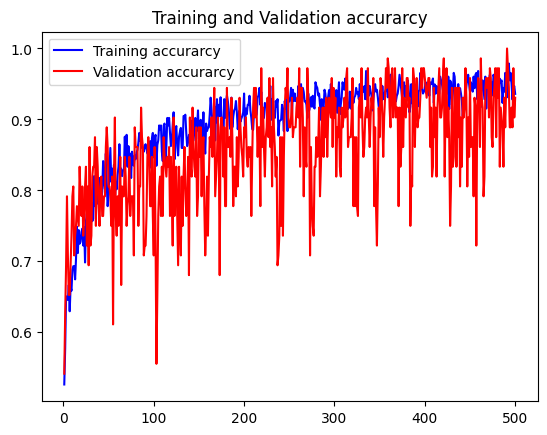

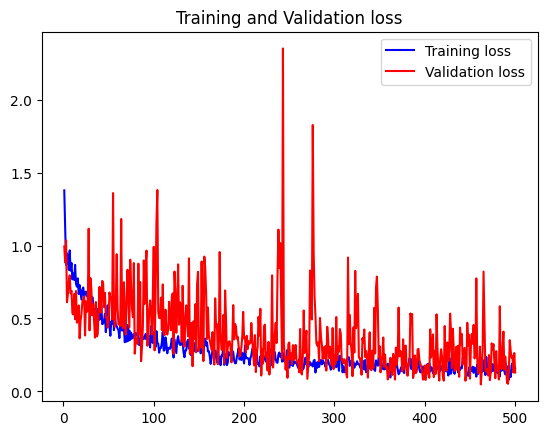

In [ ]:
import matplotlib.pyplot as plt
acc = his.history['acc']
val_acc = his.history['val_acc']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/project/finalproject/models/model_500_63.h5")

In [ ]:
scores = model.evaluate_generator(generator=valid_generator)
print(f"Test Accuracy: {scores[1]*100}")

<ipython-input-22-b025349ced05>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(generator=valid_generator)


Test Accuracy: 93.06930899620056


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image you want to make a prediction on
img_path = "/content/sample_data/seg/Grape___Black_rot/Grape___Black_rot11_segmented.png"
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make the prediction using the trained model
predictions = model.predict(x)

# Print the predicted class probabilities
print(predictions)

1/1 [==============================] - 0s 326ms/step
[[0.01820384 0.20800558 0.76842934 0.0053612 ]]


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image you want to make a prediction on
img_path = "/content/sample_data/seg/Grape___healthy/Grape___healthy2.JPG"
img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make the prediction using the trained model
predictions = model.predict(x)

# Print the predicted class probabilities
print(predictions)

# Get the class indices from the train_generator object
class_indices = train_generator.class_indices
print(class_indices)
# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted class name
predicted_class_name = list(class_indices.keys())[list(class_indices.values()).index(predicted_class_index)]

# Print the predicted class name
print(predicted_class_name)


1/1 [==============================] - 0s 24ms/step
[[5.1264860e-06 5.2430896e-06 8.4575249e-06 9.9998116e-01]]
{'Grape___Black_rot': 0, 'Grape___Esca': 1, 'Grape___Leaf_blight': 2, 'Grape___healthy': 3}
Grape___healthy


In [ ]:
# this is for testing phase

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.91 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:

!yolo train model=yolov8x.pt data=/content/dataset.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.0.91 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/dataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=Non

In [ ]:
!unzip /content/dataset1.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset1/images/train/Grape___Leaf_blight472.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight474.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight475.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight476.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight477.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight479.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight48.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight482.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight483.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight484.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight486.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight487.JPG  
  inflating: /content/dataset1/images/train/Grape___Leaf_blight488.JPG  
 

In [ ]:
!pip install ultralytics -q
!pip install pyyaml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.1/562.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 25.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import yaml
import cv2
from google.colab.patches import cv2_imshow

In [ ]:

model = YOLO("/content/drive/MyDrive/finalproject/detect/train/weights/best.pt")

In [ ]:
model.predict("/content/testdata" , save = True , save_txt = True)


image 1/814 /content/testdata/Grape___Black_rot10.JPG: 256x256 5 Grape___Black_rots, 24.3ms
image 2/814 /content/testdata/Grape___Black_rot1003.JPG: 256x256 10 Grape___Black_rots, 24.3ms
image 3/814 /content/testdata/Grape___Black_rot1004.JPG: 256x256 16 Grape___Black_rots, 24.6ms
image 4/814 /content/testdata/Grape___Black_rot101.JPG: 256x256 8 Grape___Black_rots, 25.5ms
image 5/814 /content/testdata/Grape___Black_rot1017.JPG: 256x256 5 Grape___Black_rots, 24.9ms
image 6/814 /content/testdata/Grape___Black_rot1019.JPG: 256x256 4 Grape___Black_rots, 21.9ms
image 7/814 /content/testdata/Grape___Black_rot1027.JPG: 256x256 13 Grape___Black_rots, 18.7ms
image 8/814 /content/testdata/Grape___Black_rot1033.JPG: 256x256 28 Grape___Black_rots, 19.2ms
image 9/814 /content/testdata/Grape___Black_rot1044.JPG: 256x256 2 Grape___Black_rots, 18.8ms
image 10/814 /content/testdata/Grape___Black_rot1047.JPG: 256x256 6 Grape___Black_rots, 18.8ms
image 11/814 /content/testdata/Grape___Black_rot1048.JPG:

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Grape___Black_rot', 1: 'Grape___Esca', 2: 'Leaf_blight'}
 orig_img: array([[[ 94, 101, 140],
         [101, 108, 147],
         [113, 120, 159],
         ...,
         [148, 151, 182],
         [153, 156, 187],
         [159, 162, 193]],
 
        [[ 98, 105, 144],
         [102, 109, 148],
         [110, 117, 156],
         ...,
         [155, 158, 189],
         [157, 160, 191],
         [160, 163, 194]],
 
        [[108, 115, 154],
         [108, 115, 154],
         [110, 117, 156],
         ...,
         [168, 171, 202],
         [168, 171, 202],
         [168, 171, 202]],
 
        ...,
 
        [[112, 117, 150],
         [107, 112, 145],
         [102, 107, 140],
         ...,
         [156, 160, 189],
         [157, 161, 190],
         [158, 162, 191]],
 
        [[108, 113, 146],
         [102, 107, 

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/project/finalproject/models/model_500_63.h5')


In [ ]:
from sklearn.metrics import classification_report

true_labels = test_generator.classes
predicted_probs = model.predict(test_generator)

predicted_labels = np.argmax(predicted_probs, axis=1)

print(classification_report(true_labels, predicted_labels))


26/26 [==============================] - 1s 49ms/step
              precision    recall  f1-score   support

           0       0.96      0.75      0.85       236
           1       0.94      0.99      0.96       277
           2       0.81      0.98      0.89       216
           3       1.00      0.88      0.94        85

    accuracy                           0.91       814
   macro avg       0.93      0.90      0.91       814
weighted avg       0.92      0.91      0.91       814



In [ ]:
from sklearn.metrics import confusion_matrix

true_labels = test_generator.classes
predicted_probs = model.predict(test_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)
print(cm)


26/26 [==============================] - 2s 97ms/step
[[178  13  45   0]
 [  1 275   1   0]
 [  2   2 212   0]
 [  4   3   3  75]]


In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, f1_score

# Load the test data using an ImageDataGenerator

# Get the true labels for the test data
true_labels = test_generator.classes

# Predict the labels for the test data using your deep learning model
predicted_probs = model.predict(test_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Calculate the F1 score and print the classification report
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("F1 Score: ", f1)
print(classification_report(true_labels, predicted_labels))

26/26 [==============================] - 1s 51ms/step
F1 Score:  0.9072864215264828
              precision    recall  f1-score   support

           0       0.96      0.75      0.85       236
           1       0.94      0.99      0.96       277
           2       0.81      0.98      0.89       216
           3       1.00      0.88      0.94        85

    accuracy                           0.91       814
   macro avg       0.93      0.90      0.91       814
weighted avg       0.92      0.91      0.91       814



26/26 [==============================] - 2s 77ms/step


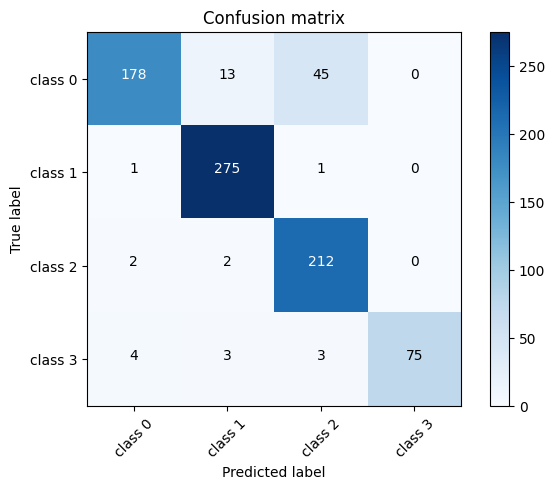

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

true_labels = test_generator.classes
predicted_probs = model.predict(test_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

# Define the class labels
class_names = ['class 0', 'class 1', 'class 2', 'class 3']

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=False,
                      title='Confusion matrix')
plt.show()
